In [30]:
#import libraries
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, LassoLars, BayesianRidge, ElasticNet
from sklearn.metrics import max_error, median_absolute_error, mean_squared_error, r2_score, explained_variance_score


# Read in cleaned data into a Pandas DataFrame

In [2]:
file = Path("Resources/clean_data_v.csv")
df = pd.read_csv(file, index_col='Unnamed: 0')
df.head()

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
y = df['price'].values
X = df.drop(columns = 'price')

# Scale the data

In [4]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Split the data into Train and Test Data sets


In [5]:
X_train , X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=7)

In [6]:
#set up a results data frame

results = pd.DataFrame(index = ['max_error', 'median_absolute_error', 'mean_squared_error', 'r2_score', 'explained_variance_score'], 
                       columns = ['LinearRegression', 'Lasso', 'Ridge', 'LassoLars', 'BayesianRidge', 'ElasticNet' ])



# Linear Regression model


In [7]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

results.loc['max_error','LinearRegression'] = max_error(y_test, y_pred)
results.loc['median_absolute_error','LinearRegression'] = median_absolute_error(y_test, y_pred)
results.loc['mean_squared_error','LinearRegression'] = mean_squared_error(y_test, y_pred)
results.loc['r2_score','LinearRegression'] = r2_score(y_test, y_pred)
results.loc['explained_variance_score','LinearRegression'] = explained_variance_score(y_test, y_pred)


# Lasso Regression model

In [8]:
lasso_reg = Lasso(alpha = 0.1, positive = True)

lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

results.loc['max_error','Lasso'] = max_error(y_test, y_pred_lasso)
results.loc['median_absolute_error','Lasso'] = median_absolute_error(y_test, y_pred_lasso)
results.loc['mean_squared_error','Lasso'] = mean_squared_error(y_test, y_pred_lasso)
results.loc['r2_score','Lasso'] = r2_score(y_test, y_pred_lasso)
results.loc['explained_variance_score','Lasso'] = explained_variance_score(y_test, y_pred_lasso)

# Ridge Regression model

In [9]:
ridge_reg = Ridge()

ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)

results.loc['max_error','Ridge'] = max_error(y_test, y_pred_ridge)
results.loc['median_absolute_error','Ridge'] = median_absolute_error(y_test, y_pred_ridge)
results.loc['mean_squared_error','Ridge'] = mean_squared_error(y_test, y_pred_ridge)
results.loc['r2_score','Ridge'] = r2_score(y_test, y_pred_ridge)
results.loc['explained_variance_score','Ridge'] = explained_variance_score(y_test, y_pred_ridge)

# LassoLars model

In [10]:
lars = LassoLars(alpha=.5, positive = True)

lars.fit(X_train, y_train)

y_pred_lars = lars.predict(X_test)

results.loc['max_error','LassoLars'] = max_error(y_test, y_pred_lars)
results.loc['median_absolute_error','LassoLars'] = median_absolute_error(y_test, y_pred_lars)
results.loc['mean_squared_error','LassoLars'] = mean_squared_error(y_test, y_pred_lars)
results.loc['r2_score','LassoLars'] = r2_score(y_test, y_pred_lars)
results.loc['explained_variance_score','LassoLars'] = explained_variance_score(y_test, y_pred_lars)

# BayesianRidge model

In [11]:
br_model = BayesianRidge()
br_model.fit(X_train, y_train)

y_pred_br = br_model.predict(X_test)

results.loc['max_error','BayesianRidge'] = max_error(y_test, y_pred_br)
results.loc['median_absolute_error','BayesianRidge'] = median_absolute_error(y_test, y_pred_br)
results.loc['mean_squared_error','BayesianRidge'] = mean_squared_error(y_test, y_pred_br)
results.loc['r2_score','BayesianRidge'] = r2_score(y_test, y_pred_br)
results.loc['explained_variance_score','BayesianRidge'] = explained_variance_score(y_test, y_pred_br)

# ElasticNet model

In [12]:
en_model = ElasticNet()
en_model.fit(X_train, y_train)

y_pred_en = en_model.predict(X_test)

results.loc['max_error','ElasticNet'] = max_error(y_test, y_pred_en)
results.loc['median_absolute_error','ElasticNet'] = median_absolute_error(y_test, y_pred_en)
results.loc['mean_squared_error','ElasticNet'] = mean_squared_error(y_test, y_pred_en)
results.loc['r2_score','ElasticNet'] = r2_score(y_test, y_pred_en)
results.loc['explained_variance_score','ElasticNet'] = explained_variance_score(y_test, y_pred_en)

In [13]:
results.head()

,LinearRegression,Lasso,Ridge,LassoLars,BayesianRidge,ElasticNet
max_error,15356.6,11715.1,15343.2,14073.1,15343.3,19275.6
median_absolute_error,530.072,602.341,530.45,505.006,530.452,756.033
mean_squared_error,1.25408e+06,1.32291e+06,1.25415e+06,1.92482e+06,1.25415e+06,2.43975e+06
r2_score,0.920623,0.916266,0.920618,0.878168,0.920618,0.845575
explained_variance_score,0.920625,0.916268,0.92062,0.878171,0.92062,0.845578


In [14]:
results.to_csv('Resources/Linear_models_results.csv')

In [15]:
log_regression_df = pd.DataFrame({'y_test' : y_test, 
                                  'y_pred': y_pred,
                                 'y_lasso': y_pred_lasso })

log_regression_df.hvplot.table()

:Table   [y_test,y_pred,y_lasso]

In [16]:
log_regression_df.describe()

,y_test,y_pred,y_lasso
count,17801.000000,17801.000000,17801.000000
mean,3929.826190,3934.707426,3936.142605
std,3974.906564,3808.188116,3807.011516
min,327.000000,-3815.271615,-3845.982087
25%,942.000000,1065.369010,944.791022
50%,2389.000000,2820.947135,2979.336926
75%,5392.000000,5946.415885,6120.638823
max,18806.000000,33887.634635,30246.072947


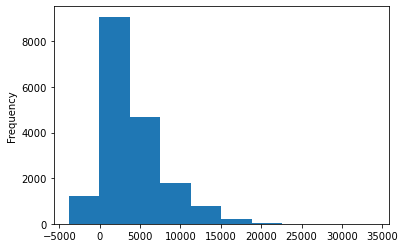

In [17]:
log_regression_df['y_pred'].plot.hist(bins = 10)

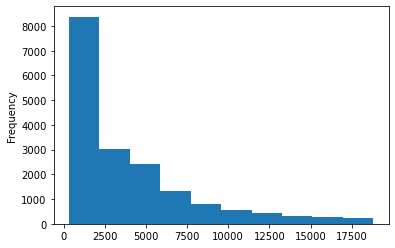

In [18]:
log_regression_df['y_test'].plot.hist( bins = 10)

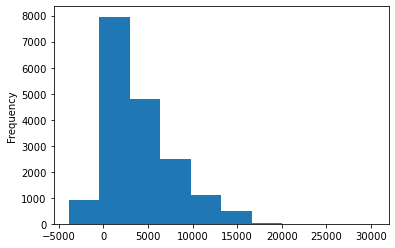

In [19]:
log_regression_df['y_lasso'].plot.hist( bins = 10)

# Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV

linear_reg = LinearRegression()

parameters =  {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

clf = GridSearchCV(linear_reg, parameters)
clf.fit(X_scaled, y)



sorted(clf.cv_results_.keys())
['mean_fit_time', 'mean_score_time', 'mean_test_score',
 'param_C', 'param_kernel', 'params',
 'rank_test_score', 'split0_test_score',
 'split2_test_score', 
 'std_fit_time', 'std_score_time', 'std_test_score']

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [35]:
print ("r2 / variance : ", clf.best_score_)
print("Residual sum of squares:", np.mean((clf.predict(X_test) - y_test) ** 2))

r2 / variance :  -2.647959646695935
Residual sum of squares: 1251897.1695232957
